# LSTM과 GRU 셀
#### 핵심키워드: LSTM, 셀 상태, GRU

In [1]:
from tensorflow.keras.datasets import imdb
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words=500)

train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, test_size=0.2, random_state=42)

In [2]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

train_seq = pad_sequences(train_input, maxlen=100)
val_seq = pad_sequences(val_input, maxlen=100)

In [3]:
from tensorflow import keras
model = keras.Sequential()
model.add(keras.layers.Embedding(500, 16, input_length=100))
model.add(keras.layers.LSTM(8))
model.add(keras.layers.Dense(1, activation='sigmoid'))

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           8000      
                                                                 
 lstm (LSTM)                 (None, 8)                 800       
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 8,809
Trainable params: 8,809
Non-trainable params: 0
_________________________________________________________________


In [6]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-lstm-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model.fit(train_seq, train_target, epochs=100, batch_size=64, validation_data=(val_seq, val_target), callbacks=[checkpoint_cb, early_stopping_cb])


Epoch 1/100
313/313 [==============================] - 11s 27ms/step - loss: 0.6914 - accuracy: 0.5483 - val_loss: 0.6891 - val_accuracy: 0.5912
Epoch 2/100
313/313 [==============================] - 8s 26ms/step - loss: 0.6847 - accuracy: 0.6262 - val_loss: 0.6777 - val_accuracy: 0.6604
Epoch 3/100
313/313 [==============================] - 8s 26ms/step - loss: 0.6505 - accuracy: 0.6881 - val_loss: 0.6044 - val_accuracy: 0.7094
Epoch 4/100
313/313 [==============================] - 8s 26ms/step - loss: 0.5710 - accuracy: 0.7240 - val_loss: 0.5552 - val_accuracy: 0.7290
Epoch 5/100
313/313 [==============================] - 8s 27ms/step - loss: 0.5370 - accuracy: 0.7470 - val_loss: 0.5356 - val_accuracy: 0.7450
Epoch 6/100
313/313 [==============================] - 8s 26ms/step - loss: 0.5149 - accuracy: 0.7652 - val_loss: 0.5152 - val_accuracy: 0.7584
Epoch 7/100
313/313 [==============================] - 8s 26ms/step - loss: 0.4976 - accuracy: 0.7754 - val_loss: 0.5038 - val_accuracy

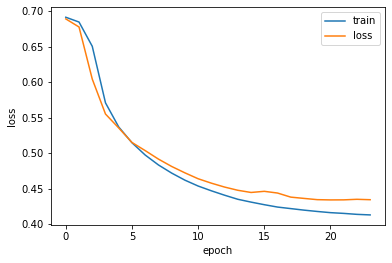

In [7]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'loss'])
plt.show()

In [8]:
model2 = keras.Sequential()
model2.add(keras.layers.Embedding(500, 16, input_length=100))
model2.add(keras.layers.LSTM(8, dropout=0.3))
model2.add(keras.layers.Dense(1, activation='sigmoid'))

In [9]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model2.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-dropout-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model2.fit(train_seq, train_target, epochs=100, batch_size=64, validation_data = (val_seq, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 11s 28ms/step - loss: 0.6927 - accuracy: 0.5152 - val_loss: 0.6922 - val_accuracy: 0.5306
Epoch 2/100
313/313 [==============================] - 8s 26ms/step - loss: 0.6902 - accuracy: 0.5691 - val_loss: 0.6888 - val_accuracy: 0.5846
Epoch 3/100
313/313 [==============================] - 8s 26ms/step - loss: 0.6845 - accuracy: 0.6208 - val_loss: 0.6803 - val_accuracy: 0.6418
Epoch 4/100
313/313 [==============================] - 8s 26ms/step - loss: 0.6640 - accuracy: 0.6841 - val_loss: 0.6345 - val_accuracy: 0.7190
Epoch 5/100
313/313 [==============================] - 8s 27ms/step - loss: 0.5945 - accuracy: 0.7173 - val_loss: 0.5748 - val_accuracy: 0.7240
Epoch 6/100
313/313 [==============================] - 8s 26ms/step - loss: 0.5643 - accuracy: 0.7319 - val_loss: 0.5527 - val_accuracy: 0.7394
Epoch 7/100
313/313 [==============================] - 8s 26ms/step - loss: 0.5434 - accuracy: 0.7475 - val_loss: 0.5348 - val_accuracy

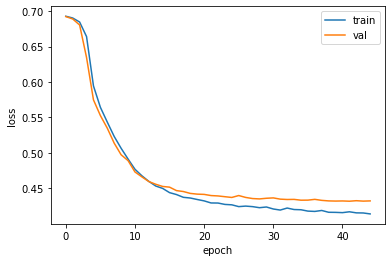

In [10]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [11]:
model3 = keras.Sequential()
model3.add(keras.layers.Embedding(500, 16, input_length=100))
model3.add(keras.layers.LSTM(8, dropout=0.3, return_sequences=True))
model3.add(keras.layers.LSTM(8, dropout=0.3))
model3.add(keras.layers.Dense(1, activation='sigmoid'))

In [12]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 16)           8000      
                                                                 
 lstm_2 (LSTM)               (None, 100, 8)            800       
                                                                 
 lstm_3 (LSTM)               (None, 8)                 544       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 9,353
Trainable params: 9,353
Non-trainable params: 0
_________________________________________________________________


In [13]:
model4 = keras.Sequential()
model4.add(keras.layers.Embedding(500, 16, input_length=100))
model4.add(keras.layers.GRU(8))
model4.add(keras.layers.Dense(1, activation='sigmoid'))

In [15]:
model4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 100, 16)           8000      
                                                                 
 gru (GRU)                   (None, 8)                 624       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8,633
Trainable params: 8,633
Non-trainable params: 0
_________________________________________________________________


In [16]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model4.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-gru-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model4.fit(train_seq, train_target, epochs=100, batch_size=64, validation_data=(val_seq, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 14s 36ms/step - loss: 0.6926 - accuracy: 0.5347 - val_loss: 0.6920 - val_accuracy: 0.5490
Epoch 2/100
313/313 [==============================] - 10s 34ms/step - loss: 0.6908 - accuracy: 0.5899 - val_loss: 0.6901 - val_accuracy: 0.5794
Epoch 3/100
313/313 [==============================] - 11s 35ms/step - loss: 0.6879 - accuracy: 0.6065 - val_loss: 0.6867 - val_accuracy: 0.5972
Epoch 4/100
313/313 [==============================] - 11s 35ms/step - loss: 0.6832 - accuracy: 0.6237 - val_loss: 0.6814 - val_accuracy: 0.6102
Epoch 5/100
313/313 [==============================] - 11s 34ms/step - loss: 0.6755 - accuracy: 0.6366 - val_loss: 0.6723 - val_accuracy: 0.6218
Epoch 6/100
313/313 [==============================] - 11s 35ms/step - loss: 0.6630 - accuracy: 0.6489 - val_loss: 0.6579 - val_accuracy: 0.6402
Epoch 7/100
313/313 [==============================] - 11s 35ms/step - loss: 0.6424 - accuracy: 0.6687 - val_loss: 0.6331 - val_ac

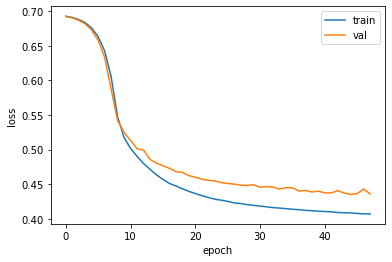

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

* **LSTM** 셀은 타임스텝이 긴 데이터를 효과적으로 학습하기 위해 고안된 순환층이다. 입력게이트, 삭제게이트, 출력게이트 역할을 하는 작은 셀이 포함되어 있다.
* LSTM 셀은 은닉 상태 외에 **셀 상태**를 출력한다. 셀 상태는 다음 층으로 전달되지 않으며 현재 셀에서만 순환된다.
* **GRU** 셀은 LSTM 셀의 간소화 버전으로 생각할 수 있지만 LSTM 셀에 못지않는 성능을 낸다.